# Task 1

In [23]:
from subprocess import check_output
import os
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def get_prob_MC(N, k, repeat):
    if not os.path.exists('task1/MC.exe'):
        try:
            os.system('g++ task1/task1_MC.cpp -o task1/MC.exe')
        except:
            raise SystemError('Cannot compile\n\'g++ task1/task1_MC.cpp -o task1/MC.exe\'')
    return float(check_output('task1/MC.exe '+str(N)+' '+str(k)+' '+str(repeat), universal_newlines=True))

def MC(array, k = 5, repeat = 10000):
    return np.array([get_prob_MC(i, k, repeat) for i in array])

def get_prob_EX(N, k): # does not work
    return float(check_output('task1/t1.exe'+' '+str(N)+' '+str(k), universal_newlines=True))

In [ ]:
data = MC(np.arange(1, 300), 10, 15000)

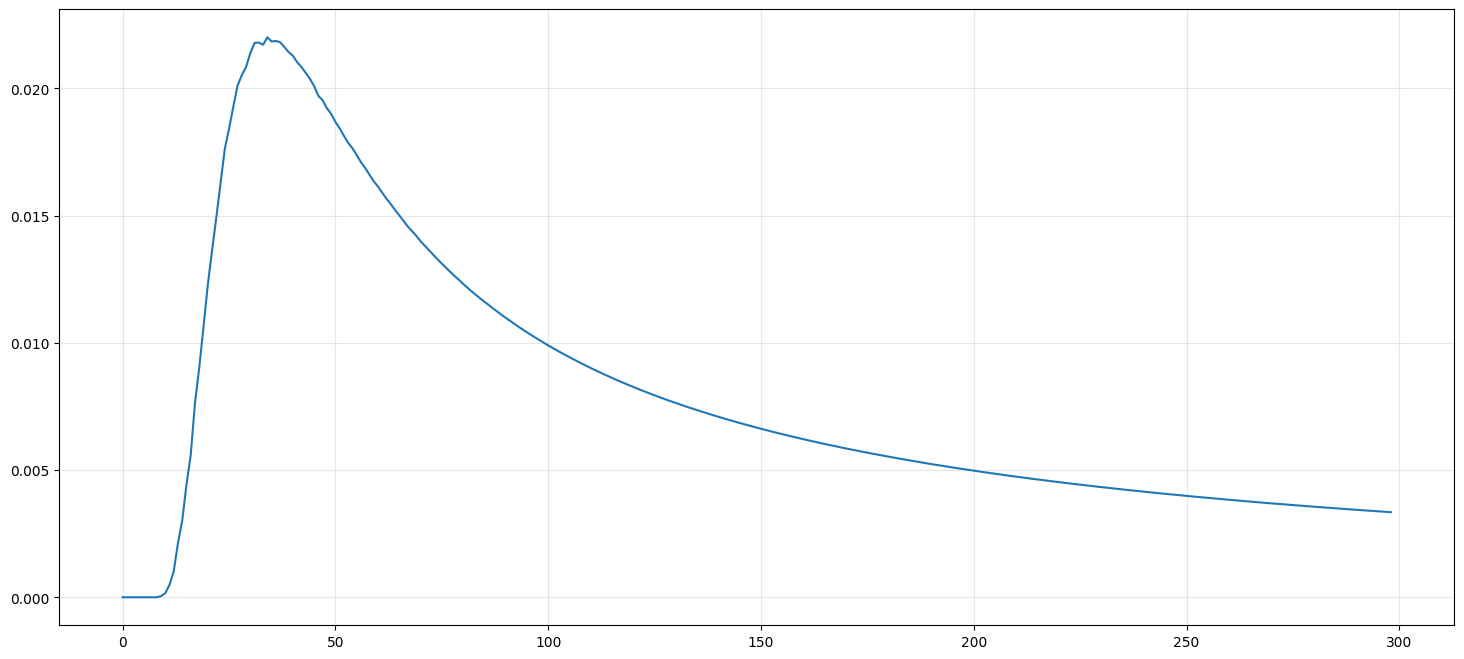

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 8)

ax.plot(data)

ax.grid(True, alpha=.3)
plt.show()

# Task 2

In [32]:
def t2_MC(k, comb, repeat=None, max_num=None):
    if not os.path.exists('task2/t2_MC.exe'):
        try:
            os.system('g++ task2/task2_MC.cpp -o task2/t2_MC.exe')
        except:
            raise SystemError('Cannot compile\n\'g++ task2/task2_MC.cpp -o task2/t2_MC.exe\'')
    command = 'task2/t2_MC.exe -r %s -c %s ' % (k, comb)
    if repeat != None:
        command += '-i %s ' % repeat
    if max_num != None:
        command += '-m %s' % max_num
    arr = [int(r) for r in check_output(command, universal_newlines=True).split()]
    m = mean(arr)
    return m, np.sqrt(mean([i ** 2 for i in arr]) - m ** 2)
    
def generate(length = 3, numbers = 3):
    res = ['']
    for _ in range(length):
        res = [str(k) + r for k in range(1, numbers + 1) for r in res]
    return res

In [46]:
length, num = 2, 2
repeat = 1000000
names_2 = generate(length, num)

In [33]:
stats_2 = [round(t2_MC(num, n, repeat)[0]) for n in names_2]

In [47]:
length, num = 3, 3
names_3  = generate(length, num)

In [20]:
stats_3 = [round(t2_MC(num, n, repeat)[0]) for n in names_3]

In [48]:
length, num = 4, 4
names_4 = generate(length, num)

In [16]:
stats_4 = [round(t2_MC(num, n, repeat)[0]) for n in names_4]

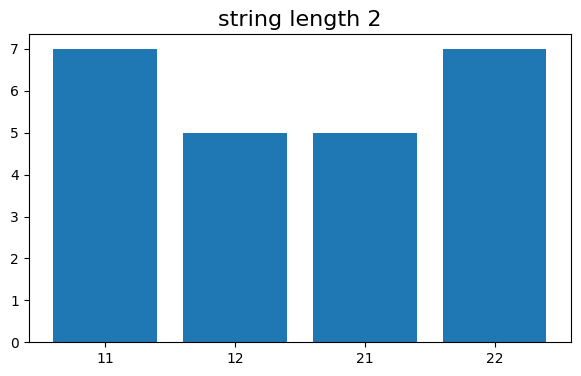

In [55]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title('string length 2', fontsize=16)

ax.bar(names_2, stats_2)
plt.show()

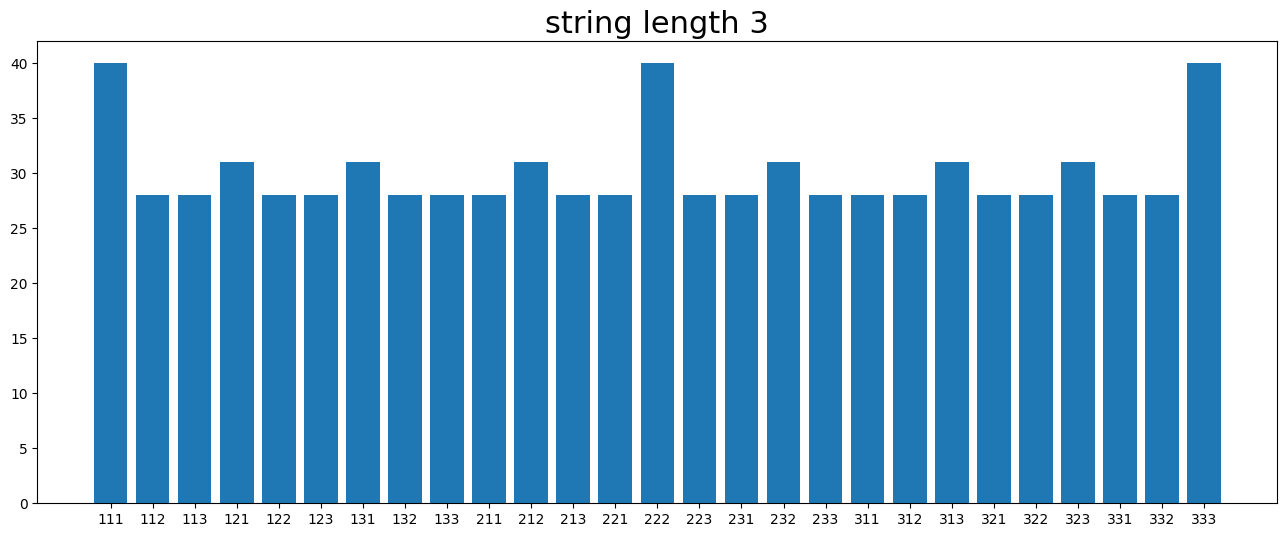

In [59]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('string length 3', fontsize=22)

ax.bar(names_3, stats_3)
plt.show()

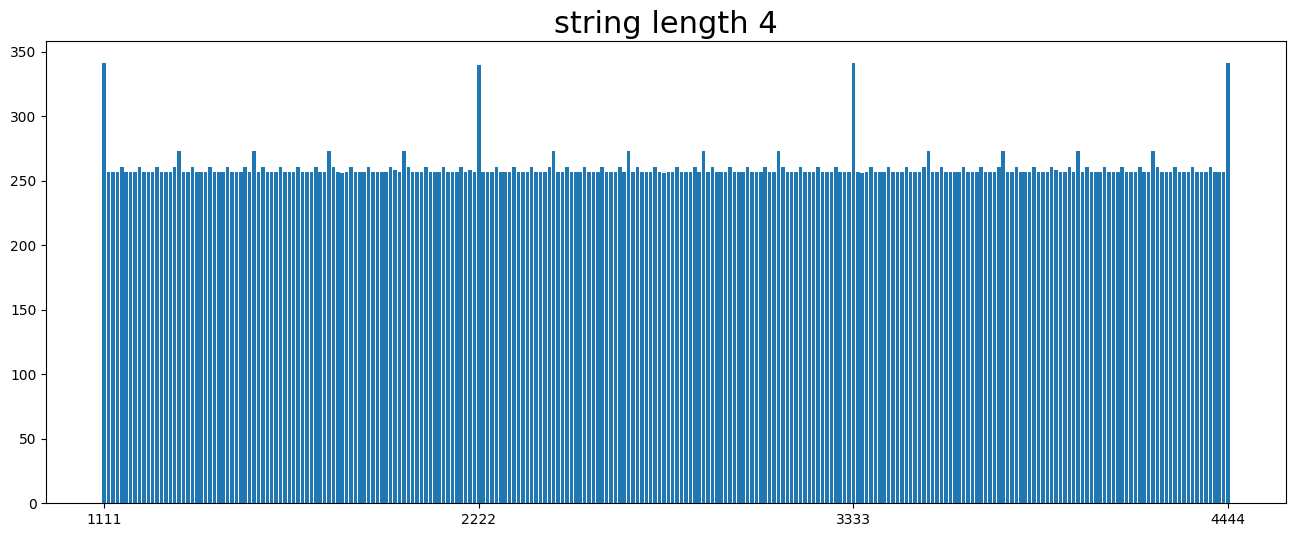

In [61]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('string length 4', fontsize=22)

ax.bar(names_4, stats_4)
ax.set_xticks(['1111','2222','3333', '4444'])
plt.show()